In [136]:
# import the libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as m

from datetime import datetime as dt

In [74]:
ml_small_movies = pd.read_csv('ml-latest-small/movies.csv')
ml_small_movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [33]:
genre_string = ml_small_movies[10:11].genres.values[0]
genre_test = genre_string.split('|')
genre_test

['Comedy', 'Drama', 'Romance']

In [34]:
ml_small_ratings = pd.read_csv('ml-latest-small/ratings.csv')
ml_small_ratings[10:20]

,userId,movieId,rating,timestamp
10,1,1371,2.5,1260759135
11,1,1405,1.0,1260759203
12,1,1953,4.0,1260759191
13,1,2105,4.0,1260759139
14,1,2150,3.0,1260759194
15,1,2193,2.0,1260759198
16,1,2294,2.0,1260759108
17,1,2455,2.5,1260759113
18,1,2968,1.0,1260759200
19,1,3671,3.0,1260759117


In [147]:
# try selecting only ratings for a movie
movie_name = 'star trek into'

titles = ml_small_movies.title
selection = titles.str.lower().str.contains(movie_name)
movie_entry = ml_small_movies[selection].iloc[0]
movie_id = movie_entry.movieId
movie_title = movie_entry.title
movie_ratings = ml_small_ratings.query('movieId==@movie_id').sort_values(by='timestamp')

print '"%s" ID: %d' % (movie_title, movie_id)
movie_ratings.head()

"Star Trek Into Darkness (2013)" ID: 102445


,userId,movieId,rating,timestamp
11703,73,102445,4.0,1369205577
22626,157,102445,4.0,1371067235
38163,275,102445,5.0,1371670853
95004,624,102445,3.0,1380312400
2497,15,102445,3.0,1386367981


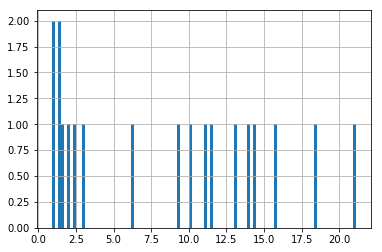

In [146]:
# look at difference in timestamps -> frequency of reviews
time_offset = movie_ratings.timestamp.diff()
(time_offset/week_time).hist(bins=100)

In [103]:
week_time = 604800 # number of seconds in a week
toy_story_ratings.rolling(window=week_time, on='timestamp').mean()

,userId,movieId,rating,timestamp
495,NaN,NaN,NaN,851866703
699,NaN,NaN,NaN,938629179
889,NaN,NaN,NaN,1331380058
962,NaN,NaN,NaN,997938310
3105,NaN,NaN,NaN,855190091
3528,NaN,NaN,NaN,1238729767
4008,NaN,NaN,NaN,1148729853
4781,NaN,NaN,NaN,1360087980
5048,NaN,NaN,NaN,944943070
6625,NaN,NaN,NaN,981308121
